In [1]:
#Required Libraries
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read dataset
data = pd.read_csv("student_scores.csv")

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   99 non-null     float64
 1   Scores  99 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [5]:
data.shape

(99, 2)

In [6]:
data = data.drop_duplicates()

In [7]:
data.shape

(80, 2)

In [8]:
data['Hours']

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
     ... 
93    7.1
94    7.2
96    7.2
97    7.2
98    7.3
Name: Hours, Length: 80, dtype: float64

In [9]:
#Assign feature column to x and label column to y
x = data['Hours'].values
y = data['Scores'].values

print(x)
print(y)
print(x.shape)
print(y.shape)

[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8 5.4 5.4 5.4 5.5 5.5 5.5 5.6 5.6 5.6 5.7 5.7
 5.7 5.8 5.8 5.8 5.9 5.9 6.  6.  6.  6.1 6.1 6.1 6.2 6.2 6.2 6.3 6.3 6.3
 6.4 6.4 6.5 6.5 6.5 6.6 6.6 6.6 6.7 6.7 6.7 6.8 6.8 6.8 6.9 6.9 6.9 7.
 7.  7.1 7.1 7.1 7.2 7.2 7.2 7.3]
[ 21  47  27  75  30  20  88  60  81  25  85  62  41  42  17  95  30  24
  67  69  30  54  35  76  86  60  61  62  63  64  65  66  67  68  68  69
  70  71  72  73  74  75  76  77  78  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  91  92  93  94  95  96  97  98  99  99 100 101 102
 103 104 105 106 107 108 109 109]
(80,)
(80,)


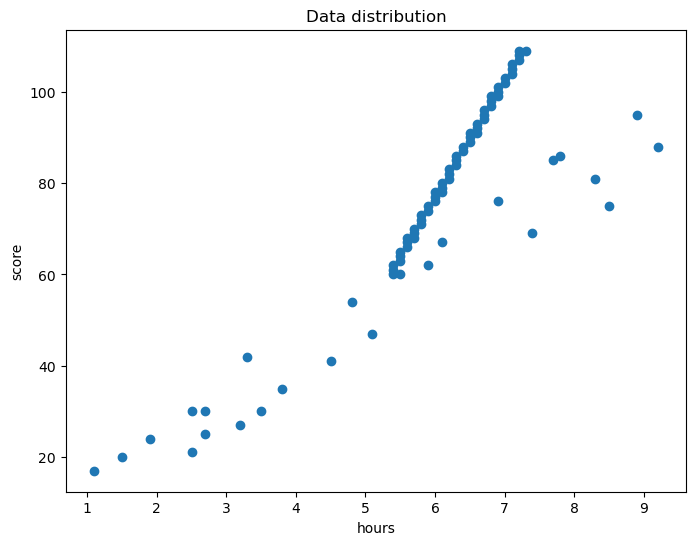

In [10]:
#Visualization

plt.figure(figsize=(8,6))
plt.scatter(x, y)

plt.title('Data distribution')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [11]:
# Hyper-parameteres
L_rate = 0.001
iterations = 100

# Initialization
theta_1= 0
theta_0= 0

# The number of samples in the dataset
n = x.shape[0]

# An empty list to store the error in each iteration
losses = []

for i in range(iterations):
    h_x = theta_0 + theta_1*x
    
    # Keeping track of the error decrease
    mse = (1/n) * np.sum((h_x - y)**2)
    losses.append(mse)
    
    # Derivatives
    d_theta0 = (2/n) * np.sum(h_x-y)
    d_theta1 = (2/n) * np.sum(x * (h_x-y))
    
#     # Values update
    theta_1 = theta_1 - L_rate * d_theta1
    theta_0 = theta_0 - L_rate* d_theta0

In [12]:
print("theta_0= ", theta_0)
print("theta_1= ", theta_1)
print("MSE= ", mse)

theta_0=  1.8633110580572452
theta_1=  12.367947248435346
MSE=  126.18188295586147


In [13]:
# predict the score for a new student
new_x= 9

Prediction_Model = theta_0 + theta_1*new_x
print ('Score:', Prediction_Model)

Score: 113.17483629397536


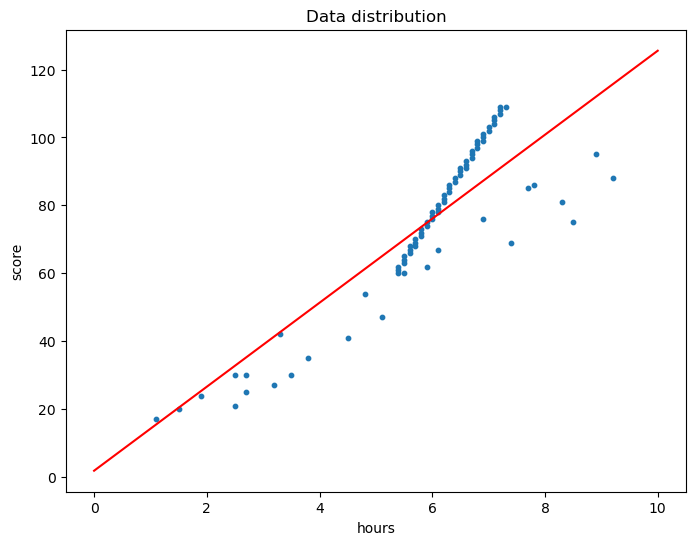

In [14]:
x_line = np.linspace(0,10,100)
y_line = theta_0 + theta_1*x_line
plt.figure(figsize=(8,6))
plt.title('Data distribution')
plt.plot(x_line, y_line, c='r')
plt.scatter(x, y, s=10)
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

Initial loss	: 6121.212500000001
Final loss	: 126.18188295586147


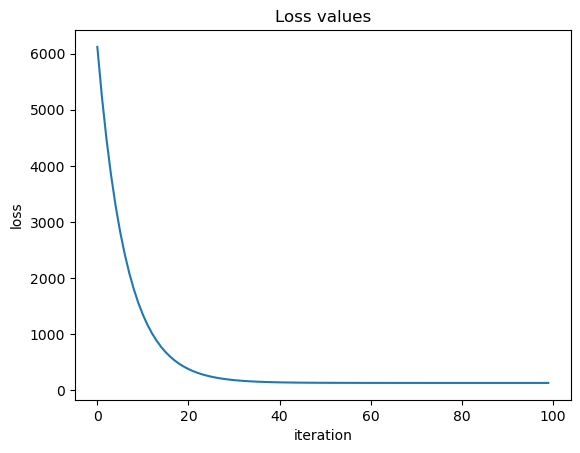

In [15]:
plt.plot(losses)

plt.title('Loss values')
plt.ylabel('loss')
plt.xlabel('iteration')
print('Initial loss\t:', losses[0])
print('Final loss\t:', losses[-1])

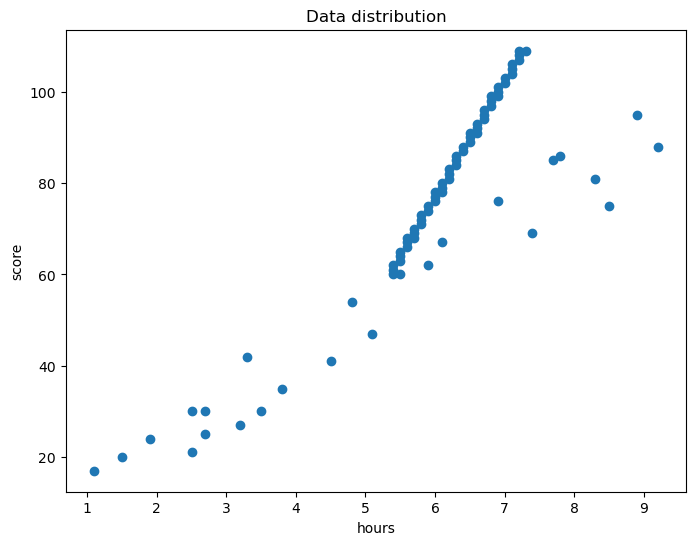

In [16]:
# now let's use sklearn 
plt.figure(figsize=(8,6))
plt.scatter(x, y)

plt.title('Data distribution')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size = 0.3)


In [20]:
#remember random rows
x_train

array([5.9, 6.3, 8.9, 6. , 2.5, 5.5, 3.2, 6.2, 5.8, 5.9, 2.7, 7.2, 8.3,
       5.7, 6.6, 7.1, 6. , 2.7, 5.9, 7.1, 5.7, 5.6, 5.6, 6.4, 5.5, 7.8,
       6.8, 7.7, 6.8, 5.4, 5.6, 5.7, 6.7, 7.3, 9.2, 7.2, 5.4, 4.5, 6.6,
       7. , 6.1, 6.8, 6.7, 5.5, 8.5, 6.5, 6.2, 6.9, 6.6, 6.1, 2.5, 6.9,
       6.3, 6.4, 3.3, 5.4])

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()

I will need first to reshape the data (Error will pop out)

In [23]:
lr.fit(x_train , y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[5.9 6.3 8.9 6.  2.5 5.5 3.2 6.2 5.8 5.9 2.7 7.2 8.3 5.7 6.6 7.1 6.  2.7
 5.9 7.1 5.7 5.6 5.6 6.4 5.5 7.8 6.8 7.7 6.8 5.4 5.6 5.7 6.7 7.3 9.2 7.2
 5.4 4.5 6.6 7.  6.1 6.8 6.7 5.5 8.5 6.5 6.2 6.9 6.6 6.1 2.5 6.9 6.3 6.4
 3.3 5.4].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [41]:
# we have to reshape it 
# reshape(-1,1) results in an array with a single column and multiple rows (a column vector)
# reshape(1,-1) results in an array with a single row and multiple columns (a row vector)
x_train = np.array(x_train).reshape(-1,1)
x_train

array([[5.9],
       [6.3],
       [8.9],
       [6. ],
       [2.5],
       [5.5],
       [3.2],
       [6.2],
       [5.8],
       [5.9],
       [2.7],
       [7.2],
       [8.3],
       [5.7],
       [6.6],
       [7.1],
       [6. ],
       [2.7],
       [5.9],
       [7.1],
       [5.7],
       [5.6],
       [5.6],
       [6.4],
       [5.5],
       [7.8],
       [6.8],
       [7.7],
       [6.8],
       [5.4],
       [5.6],
       [5.7],
       [6.7],
       [7.3],
       [9.2],
       [7.2],
       [5.4],
       [4.5],
       [6.6],
       [7. ],
       [6.1],
       [6.8],
       [6.7],
       [5.5],
       [8.5],
       [6.5],
       [6.2],
       [6.9],
       [6.6],
       [6.1],
       [2.5],
       [6.9],
       [6.3],
       [6.4],
       [3.3],
       [5.4]])

In [28]:
# do the same with the all data 
y_train = np.array(y_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [29]:
lr.fit(x_train , y_train)

LinearRegression()

In [30]:
# y intercept
c = lr.intercept_
c

array([-3.18311924])

In [31]:
# slope
m = lr.coef_
m

array([[13.02099993]])

In [32]:
y_pred_train = m*x_train + c
y_pred_train

array([[ 73.64078037],
       [ 78.84918034],
       [112.70378017],
       [ 74.94288036],
       [ 29.36938059],
       [ 68.4323804 ],
       [ 38.48408055],
       [ 77.54708035],
       [ 72.33868038],
       [ 73.64078037],
       [ 31.97358058],
       [ 90.56808028],
       [104.89118021],
       [ 71.03658038],
       [ 82.75548032],
       [ 89.26598029],
       [ 74.94288036],
       [ 31.97358058],
       [ 73.64078037],
       [ 89.26598029],
       [ 71.03658038],
       [ 69.73448039],
       [ 69.73448039],
       [ 80.15128034],
       [ 68.4323804 ],
       [ 98.38068024],
       [ 85.35968031],
       [ 97.07858025],
       [ 85.35968031],
       [ 67.1302804 ],
       [ 69.73448039],
       [ 71.03658038],
       [ 84.05758032],
       [ 91.87018028],
       [116.61008015],
       [ 90.56808028],
       [ 67.1302804 ],
       [ 55.41138046],
       [ 82.75548032],
       [ 87.9638803 ],
       [ 76.24498036],
       [ 85.35968031],
       [ 84.05758032],
       [ 68

In [33]:
lr.predict(x_train)

array([[ 73.64078037],
       [ 78.84918034],
       [112.70378017],
       [ 74.94288036],
       [ 29.36938059],
       [ 68.4323804 ],
       [ 38.48408055],
       [ 77.54708035],
       [ 72.33868038],
       [ 73.64078037],
       [ 31.97358058],
       [ 90.56808028],
       [104.89118021],
       [ 71.03658038],
       [ 82.75548032],
       [ 89.26598029],
       [ 74.94288036],
       [ 31.97358058],
       [ 73.64078037],
       [ 89.26598029],
       [ 71.03658038],
       [ 69.73448039],
       [ 69.73448039],
       [ 80.15128034],
       [ 68.4323804 ],
       [ 98.38068024],
       [ 85.35968031],
       [ 97.07858025],
       [ 85.35968031],
       [ 67.1302804 ],
       [ 69.73448039],
       [ 71.03658038],
       [ 84.05758032],
       [ 91.87018028],
       [116.61008015],
       [ 90.56808028],
       [ 67.1302804 ],
       [ 55.41138046],
       [ 82.75548032],
       [ 87.9638803 ],
       [ 76.24498036],
       [ 85.35968031],
       [ 84.05758032],
       [ 68

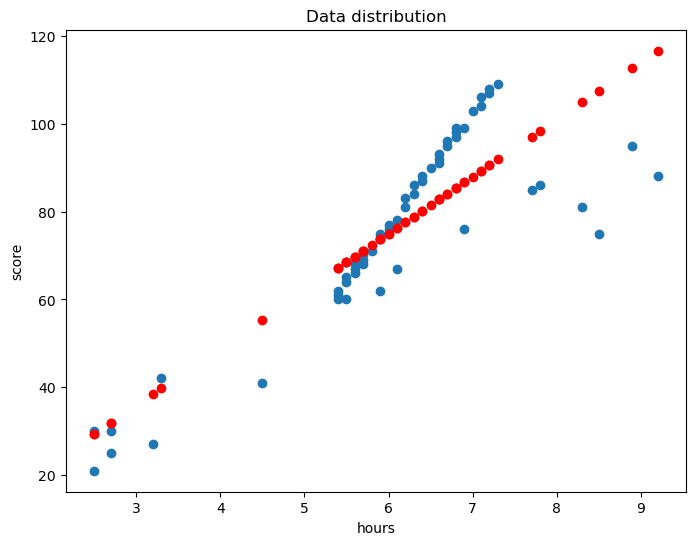

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(x_train, y_train)
plt.scatter(x_train, y_pred_train , color='r')


plt.title('Data distribution')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

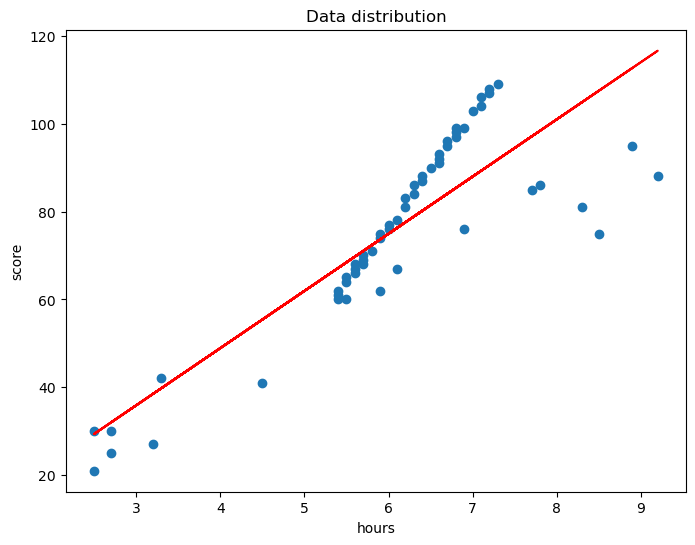

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred_train , color='r')


plt.title('Data distribution')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [36]:
# the model never seen the test data 
y_pred_test = lr.predict(x_test)
y_pred_test

array([[76.24498036],
       [68.4323804 ],
       [78.84918034],
       [86.6617803 ],
       [89.26598029],
       [72.33868038],
       [86.6617803 ],
       [81.45338033],
       [46.29668051],
       [63.22398042],
       [42.39038053],
       [16.34838066],
       [11.13998069],
       [59.31768044],
       [74.94288036],
       [81.45338033],
       [87.9638803 ],
       [84.05758032],
       [21.55678063],
       [76.24498036],
       [72.33868038],
       [90.56808028],
       [93.17228027],
       [77.54708035]])

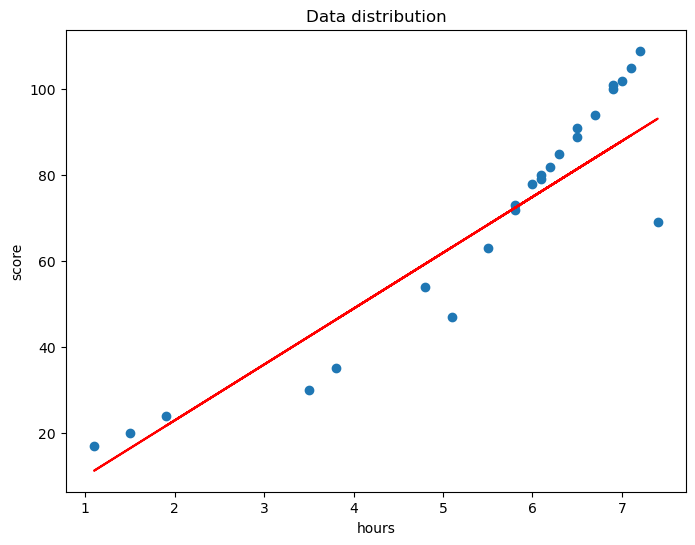

In [37]:
# let's see how good the prediction is :

plt.figure(figsize=(8,6))
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred_test , color='r')


plt.title('Data distribution')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [38]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

MAE: 8.786387348614827
MSE: 114.33650116708468
RMSE: 10.692824751537112
